In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from assistants.ai_assistant import AiAssistant
from users.user import User
from main import run

In [7]:
def plot_traces(trace):
    
    # Extract data
    b_trace = trace["b"]
    user_action_trace = np.asarray(trace["user_action"])
    assistant_action_trace = np.asarray(trace["assistant_action"])
    x = np.asarray(trace["x"]).T    
    n_epochs = len(b_trace)
    
    # Create figure
    fig, axes = plt.subplots(nrows=2, figsize=(15, 8), constrained_layout=True)
    ax = axes[0]
    im = ax.imshow(
        np.transpose(b_trace),
        interpolation="nearest", 
        aspect = "auto", 
        # vmin = 0, vmax = 1, 
        cmap = "viridis")
    c = np.asarray(['red' if a==1 else 'green' for a in user_action_trace])
    # psi = np.asarray(psi_trace)
    epochs = np.arange(n_epochs)
    # a_trace.append(0)
    a = np.asarray(user_action_trace)
    idx = a == 0
    ax.scatter(epochs[idx], assistant_action_trace[idx], c=c[idx], marker = 'v')
    idx = a == 1
    ax.scatter(epochs[idx], assistant_action_trace[idx], c=c[idx], marker = '^')
    # idx = a==0
    # ax.scatter(epochs[idx], psi[idx], c = c[idx], marker = 'o')    
    ax.invert_yaxis()
    ax.set_xlim([0,n_epochs])
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Target")
    
    cb = fig.colorbar(im, ax=ax)
    cb.set_label("Assistant belief")

    ax = axes[1]
    for i, x_ in enumerate(x):
        ax.plot(x_, label=f"Target {i}")

    ax.set_xlabel("Time")
    ax.set_ylabel("Distance to the user")
    
    ax.set_xlim([0,n_epochs])

    ax.legend();
    

In [8]:
trace = run(debug=False,
            decision_rule='epsilon_rule',
            max_n_step=500,
            n_targets=10,
            step_size=0.01,
            step_size_other=None, # 0.01,  # 0.01 / (n_targets - 1)
           )

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:24<00:00, 20.35it/s]


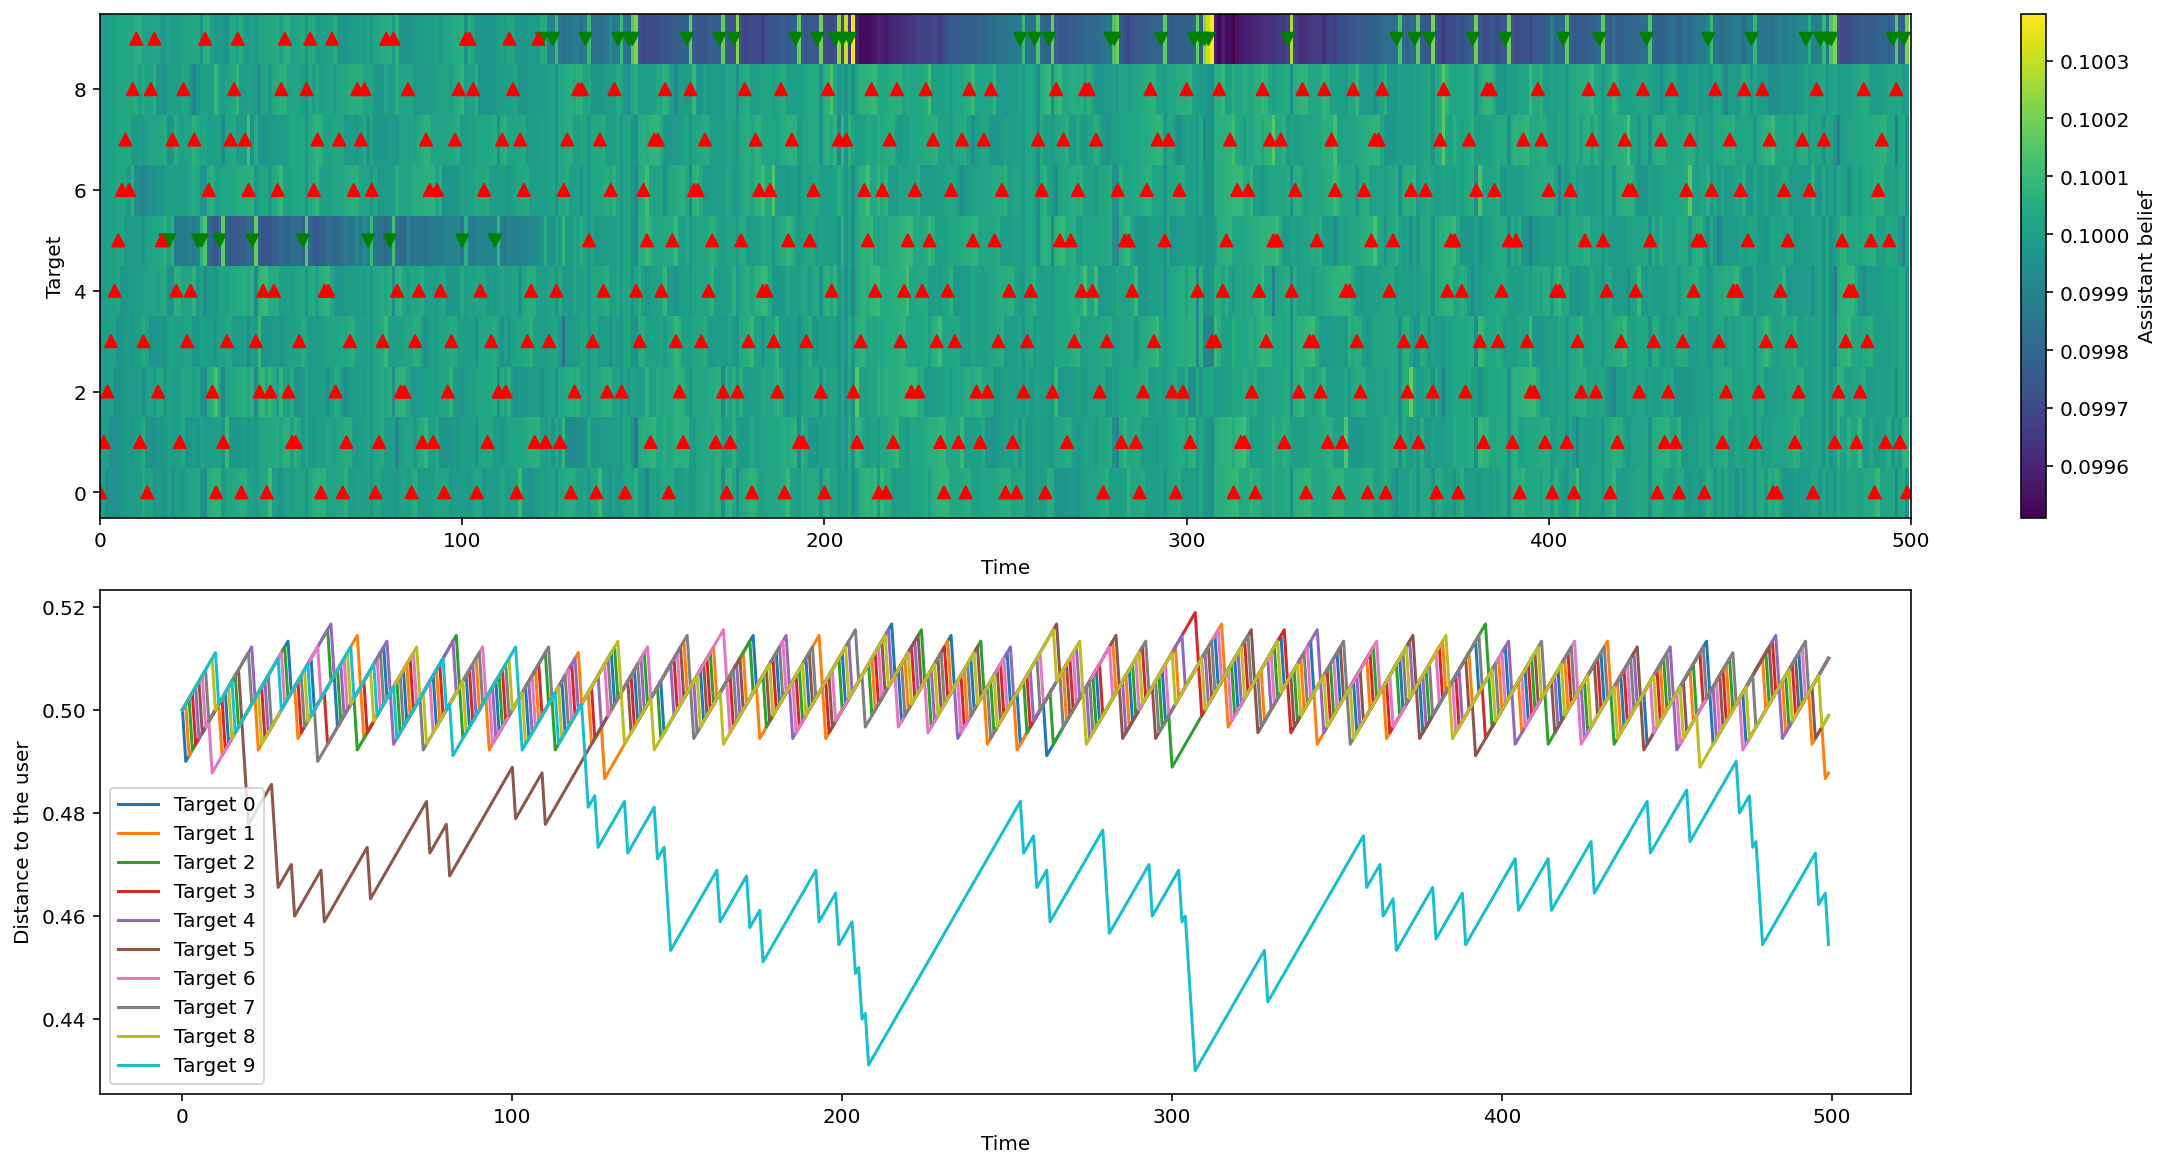

In [6]:
plot_traces(trace)

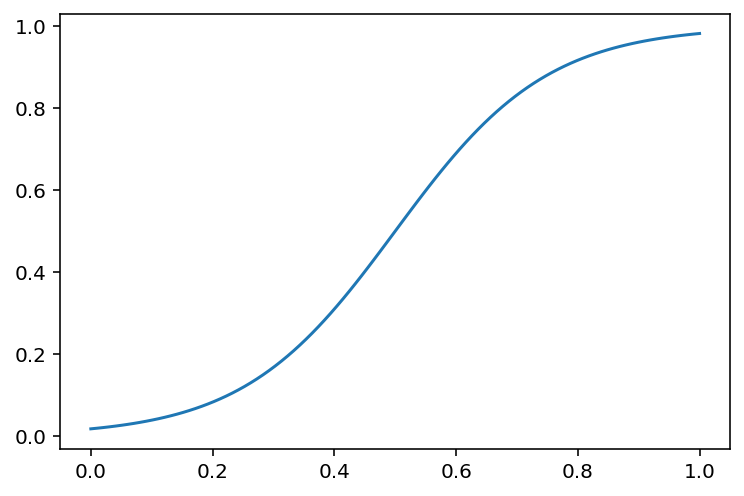

In [39]:
x = np.linspace(0.0, 1.0, 100)
y = 1 / (1+ np.exp(-8*(- 0.5 + x)))
plt.plot(x, y);